# Main

## Import dependencies


In [1]:
#Import libraries
import numpy as np
import cv2
import sys
import os
import matplotlib.pyplot as plt


## Pre-proccessing

In [2]:
from functions.fun_copy_images import copy_images

#Copio images from raw to preprocessed
folder_raw = "data/pilar_data/OC009_2023_08_15/raw"
folder_preprocessed = "data/pilar_data/OC009_2023_08_15/preprocessed"

#Delete all files in folder_preprocessed
for file in os.listdir(folder_preprocessed):
    os.remove(folder_preprocessed + '/' + file)

copy_images(folder_raw, folder_preprocessed)

#Defino files como los nombres de todos los files dentro de folder
files = os.listdir(folder_preprocessed)
#Añado a cada file la dirección de la carpeta
files = [folder_preprocessed + '/' + file for file in files]


In [3]:
#Crop
from functions.fun_crop import crop
coordenadas = (504, 0, 1008, 504)

#Corroboro que las coordenadas correspondan a imagen cuadrada
if coordenadas[2] - coordenadas[0] != coordenadas[3] - coordenadas[1]:
    raise ValueError("Las coordenadas no corresponden a una imagen cuadrada")
    
files = crop(files, coordenadas)


In [4]:
#Scaleo a 768x768
from functions.fun_scale import scale

files = scale(files, (768, 768))


In [5]:
#Gray-scale
from functions.fun_gray_scale import gray_scale

files = gray_scale(files)


## Apply tool

In [6]:
#Copio images from preprocessed to processed
folder_processed = "data/pilar_data/OC009_2023_08_15/processed"
#Delete all files in folder_processed
for file in os.listdir(folder_processed):
    os.remove(folder_processed + '/' + file)

copy_images(folder_preprocessed, folder_processed)

files = os.listdir(folder_processed)
files = [folder_processed + '/' + file for file in files]

#Por alguna razón que desconozco, hay que volver a pasar a la escala de grises
files = gray_scale(files)


In [7]:

# from choroidalyze import Choroidalyzer

# # This initialises choroidalyzer. 
# # It will try to automatically download the model weights from github the first time you run it. 
# choroidalyzer = Choroidalyzer()



# #Cargo imagen de ejemplo

# for file in files:

#     #Convierto imagen a blanco y negro
#     img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
#     cv2.imwrite(file, img)

#     # Intento sacar las metricas y hacer el plot
#     try:
#         metrics = choroidalyzer.analyze(file) #, scale=(11.49, 3.87)
#         # print(metrics)

#         # choroidalyzer also has a basic plotting function to inspect segmentation outputs
#         fig = choroidalyzer.predict_and_plot(file)
#         #Save fig as file
#         fig.savefig(file)

        

#     except Exception as e:
#         print(f"File: {file}\nError: {e}")
    




In [8]:
#Copio images from preprocessed to processed
folder_processed = "data/pilar_data/OC009_2023_08_15/processed"
#Delete all files in folder_processed

from choroidalyze import Choroidalyzer
choroidalyzer = Choroidalyzer()

for file in os.listdir(folder_processed):
    os.remove(folder_processed + '/' + file)

copy_images(folder_preprocessed, folder_processed)

In [9]:

files = os.listdir(folder_processed)
files = [folder_processed + '/' + file for file in files]

#Por alguna razón que desconozco, hay que volver a pasar a la escala de grises
files = gray_scale(files)


AttributeError: 'Axes' object has no attribute 'set_legend'

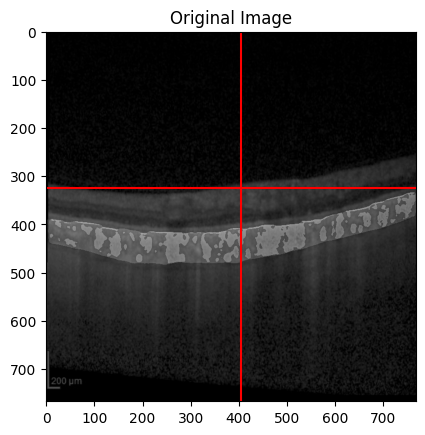

In [10]:
file = files[0]
fig = choroidalyzer.plot_together(file)